<a href="https://colab.research.google.com/github/ronbalanay/MAT-422/blob/main/MAT422_HW_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We show spectral graph bipartitioning by minimizing the cut between two subsets of a graph. We uses the graph's Laplacian matrix to calculate the Fiedler vector (eigenvector of the second smallest eigenvalue), which determines the optimal partition based on the signs of its entries. The partition is shown using red or green, balancing the subsets while minimizing edge weights between them.

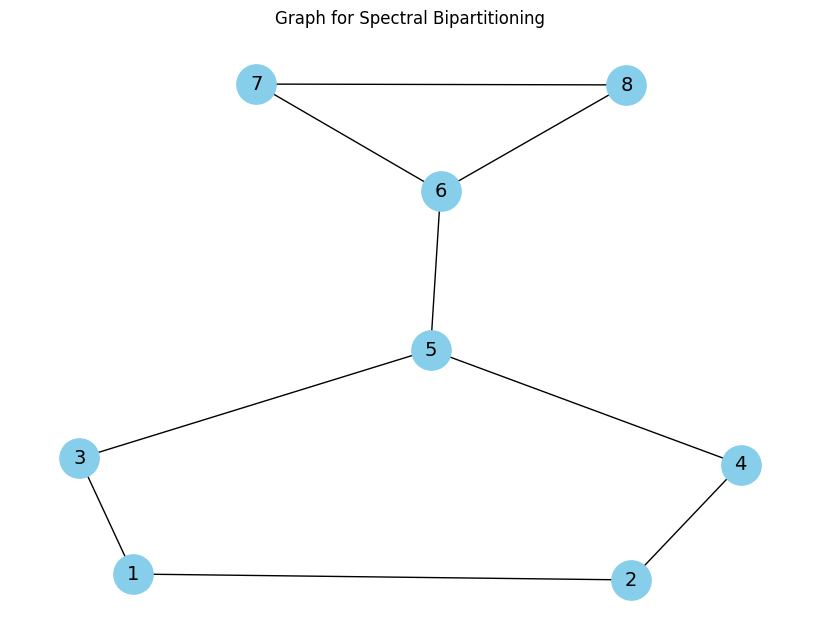

Eigenvalues of Laplacian: [3.29593611e-16 3.06474798e-01 1.38196601e+00 1.67027282e+00
 3.00000000e+00 3.32972718e+00 3.61803399e+00 4.69352520e+00]
Fiedler Vector: [ 0.36935578  0.36935578  0.25615754  0.25615754  0.06445347 -0.33870803
 -0.48838605 -0.48838605]
Partition: {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2}


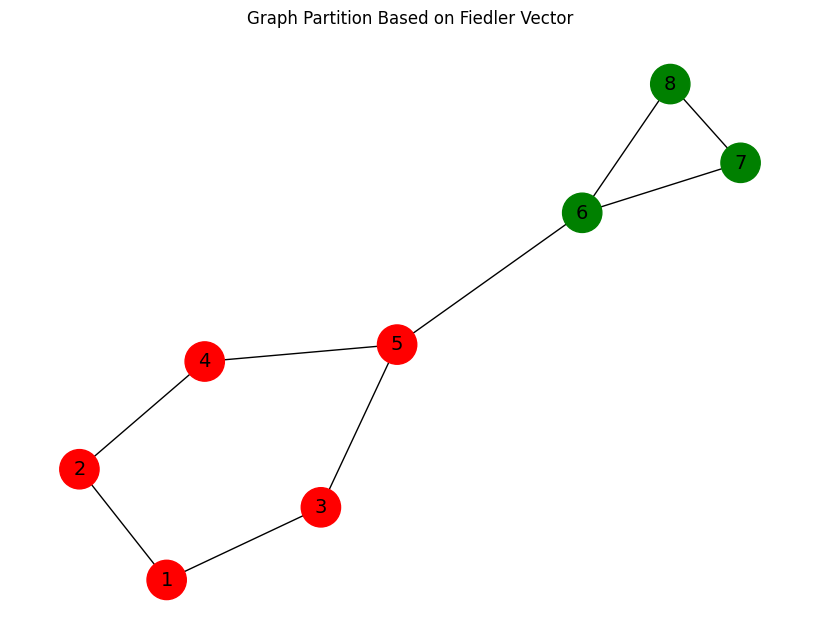

Cut Value: 1
Ratio Cut: 0.5333333333333333
Normalized Cut: 0.23376623376623376


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (5, 6), (6, 7), (6, 8), (7, 8)]
G.add_edges_from(edges)

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="skyblue", node_size=800, font_size=14)
plt.title("Graph for Spectral Bipartitioning")
plt.show()

# Compute the Laplacian matrix
L = nx.laplacian_matrix(G).toarray()

# Compute eigenvalues and eigenvectors of the Laplacian
eigenvalues, eigenvectors = np.linalg.eigh(L)
print("Eigenvalues of Laplacian:", eigenvalues)

# The Fiedler vector (second smallest eigenvector)
fiedler_vector = eigenvectors[:, 1]
print("Fiedler Vector:", fiedler_vector)

# Partition the graph based on the Fiedler vector
partition = {i + 1: 1 if fiedler_vector[i] >= 0 else 2 for i in range(len(fiedler_vector))}
print("Partition:", partition)

# Visualize the partition
colors = ["red" if partition[node] == 1 else "green" for node in G.nodes()]
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color=colors, node_size=800, font_size=14)
plt.title("Graph Partition Based on Fiedler Vector")
plt.show()

# Ratio cut and normalized cut computation
def compute_cut_metrics(G, partition):
    cut = 0
    vol_C1 = 0
    vol_C2 = 0

    C1 = [node for node, part in partition.items() if part == 1]
    C2 = [node for node, part in partition.items() if part == 2]

    for u, v in G.edges():
        if partition[u] != partition[v]:  # Edge crosses the cut
            cut += 1

    for node in G.nodes():
        degree = G.degree[node]
        if partition[node] == 1:
            vol_C1 += degree
        else:
            vol_C2 += degree

    ratio_cut = cut / len(C1) + cut / len(C2)
    normalized_cut = cut / vol_C1 + cut / vol_C2

    return cut, ratio_cut, normalized_cut

cut, ratio_cut, normalized_cut = compute_cut_metrics(G, partition)

print(f"Cut Value: {cut}")
print(f"Ratio Cut: {ratio_cut}")
print(f"Normalized Cut: {normalized_cut}")
